<!-- @format -->

# 1 创建项目环境步骤

- 1、安装 anaconda，并配置环境变量
- 2、创建虚拟环境 conda create -n myenv python=3.9
- 3、激活虚拟环境 conda activate myenv
- 4、安装相关包 pip install -r requirements.txt


<!-- @format -->

# 2 数据准备


<!-- @format -->

## 2.1 导入必要库和包


In [50]:
import pandas as pd
import numpy as np
from joblib import dump, load
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<!-- @format -->

## 2.2 读取数据集

该数据集由 13 个特征组成，描述了三个不同种类的葡萄酒。这三个类别分别是不同来源的葡萄酒，通常被标记为类别 A、B 和 C。

- alcohol - 酒精含量
- malic_acid - 酒石酸含量
- ash - 灰分含量
- alcalinity_of_ash - 灰分碱度
- magnesium - 镁含量
- total_phenols - 总酚含量
- flavanoids - 黄酮类物质含量
- nonflavanoid_phenols - 非黄酮类酚含量
- proanthocyanins - 原花青素含量
- color_intensity - 颜色强度
- hue - 色调
- od280/od315_of_diluted_wines - 稀释酒的 OD280/OD315 比值
- proline - 脯氨酸含量
  这个数据一共有 178 行（代表有 178 个样本）,14 列（代表有 13 个特征+1 列是标签）


In [51]:
# 读取csv格式数据，header=0表示第一行是列名，encoding='utf-8'表示使用utf-8编码
df = pd.read_csv('wine_data.csv',header=0,encoding='utf-8')
# 提取特征数据列名
columns = df.columns.tolist()[:-1]
df.head(15)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,A
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,A
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,A
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,A
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,A
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,A
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290,A
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295,A
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045,A
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045,A


<!-- @format -->

## 2.3 对数据进行初步探索，包括查看数据集的形状，数据类型，缺失值情况等。


In [52]:
# 显示数据集的形状，即数据集中样本的数量和特征的数量。
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    int64  
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    int64  
 13  targe

In [53]:
# 统计各类特征的数据的缺失值情况
print("数据缺失情况:")
print(df.isnull().sum())
print("*"*80)

# 计算每个特征的缺失值占总样本量的比例
missing_values_count = df.isnull().sum()
missing_values_ratio = missing_values_count / len(df) * 100
print("数据缺失比例情况:")
print(missing_values_ratio)
print("*"*80)

# 统计重复样本的个数
duplicate_count = df.duplicated().sum()
print("数据重复情况:",duplicate_count)
print("*"*80)

数据缺失情况:
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64
********************************************************************************
数据缺失比例情况:
alcohol                         0.0
malic_acid                      0.0
ash                             0.0
alcalinity_of_ash               0.0
magnesium                       0.0
total_phenols                   0.0
flavanoids                      0.0
nonflavanoid_phenols            0.0
proanthocyanins                 0.0
color_intensity                 0.0
hue                             0.0
od280/od315_of_d

<!-- @format -->

# 3 数据预处理


<!-- @format -->

## 3.1 文本标签映射


In [54]:
# 去除不存在标签的样本
df = df.dropna(subset=['target'])
# 对标签进行映射编码
label, unique_label = pd.factorize(df['target'])
label_dict = {label: idx for idx, label in enumerate(unique_label)}
# 将文字标签转化为数字标签，并添加到数据集中，此时的df的标签已经转化为数字标签
df['label'] = label
print("*"*50)
print("各类标签统计：",df["target"].unique())
# 直接输出标签的个数，即分类的个数
print("*"*50)
print("分类数量：",df["target"].nunique())
print("*"*50)
print("标签映射字典:",label_dict)

**************************************************
各类标签统计： ['A' 'B' 'C']
**************************************************
分类数量： 3
**************************************************
标签映射字典: {'A': 0, 'B': 1, 'C': 2}


In [55]:
# 特征矩阵，不包含目标变量。df中去除target列以外的列就是特征。
X = df.drop(['target','label'], axis=1) 
# df的label列是目标变量
y = df['label']

<!-- @format -->

## 3.2 划分训练集和验证集


In [56]:
# train_test_split用于划分训练集和验证集
# test_size=0.3 这个参数就代表30%的样本做验证集,一般训练集和测试集的比例是7:3或者8:2
# random_state参数设置随机数种子，保证每次切分运行结果一致。
# 因为该数据集效果太好，所以测试集比例大一点，可视化效果好一点
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("训练集样本数量：", X_train.shape[0])
print("测试集样本数量：", X_test.shape[0])

训练集样本数量： 124
测试集样本数量： 54


<!-- @format -->

## 3.3 针对不同特征进行编码处理


In [57]:
# 检测特征数据的类型，分类文本特征无法被计算机识别，所以将分类特征数据进行编码为0，1，2……
# categorical_features用于存储分类型特征字段名称
categorical_features = [] 
# continuous_features用于存储连续型特征字段名称
continuous_features = []
for column in X.columns:
    # 检查是否为字符串类型（通常为分类特征）
    if df[column].dtype == 'object':
        categorical_features.append(column)
    # 将其他类型视为连续特征
    else:
        continuous_features.append(column)
print("分类特征:", categorical_features)
print("连续特征:", continuous_features)

分类特征: []
连续特征: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [58]:

encoded_train = X_train.copy()
encoded_test = X_test.copy()
encoders = {}  # 用于保存每个特征的编码器
mapping_dicts = {}  # 用于保存每个特征的映射字典

for feature in categorical_features:
    # 创建标签编码器
    encoder = LabelEncoder()
    
    # 对训练集进行拟合和转换
    encoder.fit(encoded_train[feature])
    
    # 将训练集中的类别与未知类别合并，确保编码器可以处理未知类别
    unique_classes = list(encoder.classes_) + ['Unknown']
    encoder.classes_ = np.array(unique_classes)
    
    # 对训练集进行转换
    encoded_train[feature] = encoder.transform(encoded_train[feature])
    
    # 对验证集进行转换，处理未知类别
    encoded_test[feature] = encoded_test[feature].apply(lambda x: x if x in encoder.classes_[:-1] else 'Unknown')
    encoded_test[feature] = encoder.transform(encoded_test[feature])
    
    # 保存编码器
    encoders[feature] = encoder
    
    # 提取映射字典
    mapping = {cls: idx for idx, cls in enumerate(encoder.classes_)}
    mapping_dicts[feature] = mapping

# 保存分类特征的映射字典
with open('./models/mapping_dicts.pkl', 'wb') as f:
    pickle.dump(mapping_dicts, f)

<!-- @format -->

## 3.4 对训练集和测试集进行简单可视化分析


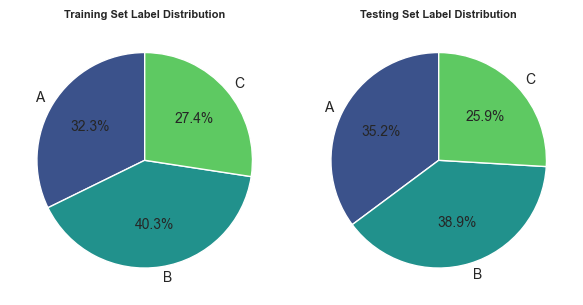

In [59]:
# 反转键值对，为了可视化更清晰，使用标签作为标注
reversed_label_dict = {v: k for k, v in label_dict.items()}
# 计算训练集和测试集的标签占比
train_counts = y_train.value_counts(normalize=True).sort_index()
test_counts = y_test.value_counts(normalize=True).sort_index()

# 使用字典映射标签名称
train_labels = [reversed_label_dict[idx] for idx in train_counts.index]
test_labels = [reversed_label_dict[idx] for idx in test_counts.index]

# 创建图表
plt.figure(figsize=(6, 3))
sns.set_style("whitegrid")

# 绘制训练集饼图
plt.subplot(1, 2, 1)
train_pie = plt.pie(
    train_counts,
    labels=train_labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("viridis", len(train_counts)),
    textprops={'fontsize': 10}
)
plt.title("Training Set Label Distribution", fontsize=8, fontweight="bold")

# 绘制测试集饼图
plt.subplot(1, 2, 2)
test_pie = plt.pie(
    test_counts,
    labels=test_labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("viridis", len(test_counts)),
    textprops={'fontsize': 10}
)
plt.title("Testing Set Label Distribution", fontsize=8, fontweight="bold")

# 调整布局
plt.tight_layout()
# 保存图表
# plt.savefig("label_distribution_pie.pdf", dpi=300, bbox_inches="tight")
plt.show()

In [60]:
# 查看输入模型的输入
encoded_train

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
138,13.49,3.59,2.19,19.5,88,1.62,0.48,0.58,0.88,5.70,0.81,1.82,580
104,12.51,1.73,1.98,20.5,85,2.20,1.92,0.32,1.48,2.94,1.04,3.57,672
78,12.33,0.99,1.95,14.8,136,1.90,1.85,0.35,2.76,3.40,1.06,2.31,750
36,13.28,1.64,2.84,15.5,110,2.60,2.68,0.34,1.36,4.60,1.09,2.78,880
93,12.29,2.83,2.22,18.0,88,2.45,2.25,0.25,1.99,2.15,1.15,3.30,290
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,13.86,1.51,2.67,25.0,86,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410
106,12.25,1.73,2.12,19.0,80,1.65,2.03,0.37,1.63,3.40,1.00,3.17,510
14,14.38,1.87,2.38,12.0,102,3.30,3.64,0.29,2.96,7.50,1.20,3.00,1547
92,12.69,1.53,2.26,20.7,80,1.38,1.46,0.58,1.62,3.05,0.96,2.06,495


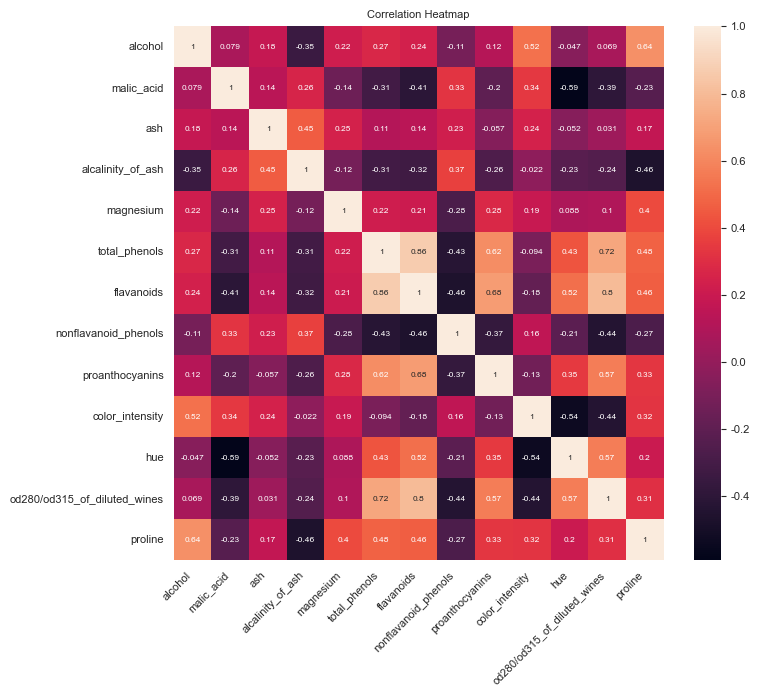

In [61]:
# 设置字体为 Arial（适合科研图表）
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 8  # 设置全局字体大小
plt.figure(figsize=(8, 7))
# 计算相关性矩阵
heat_corr=encoded_train.corr()
sns.heatmap(heat_corr, annot=True, annot_kws={"fontsize": 6})
# 设置标题和字体大小
plt.title('Correlation Heatmap',fontsize=8)
# 设置横坐标角度和字体大小
xticks = plt.xticks()
plt.xticks(xticks[0], xticks[1], rotation=45, ha='right', fontsize=8)
# 设置横坐标字体大小
plt.yticks(fontsize=8) 
# 调整字体避免重叠
plt.tight_layout()
plt.show()

<!-- @format -->

## 3.5 箱线图异常值检测


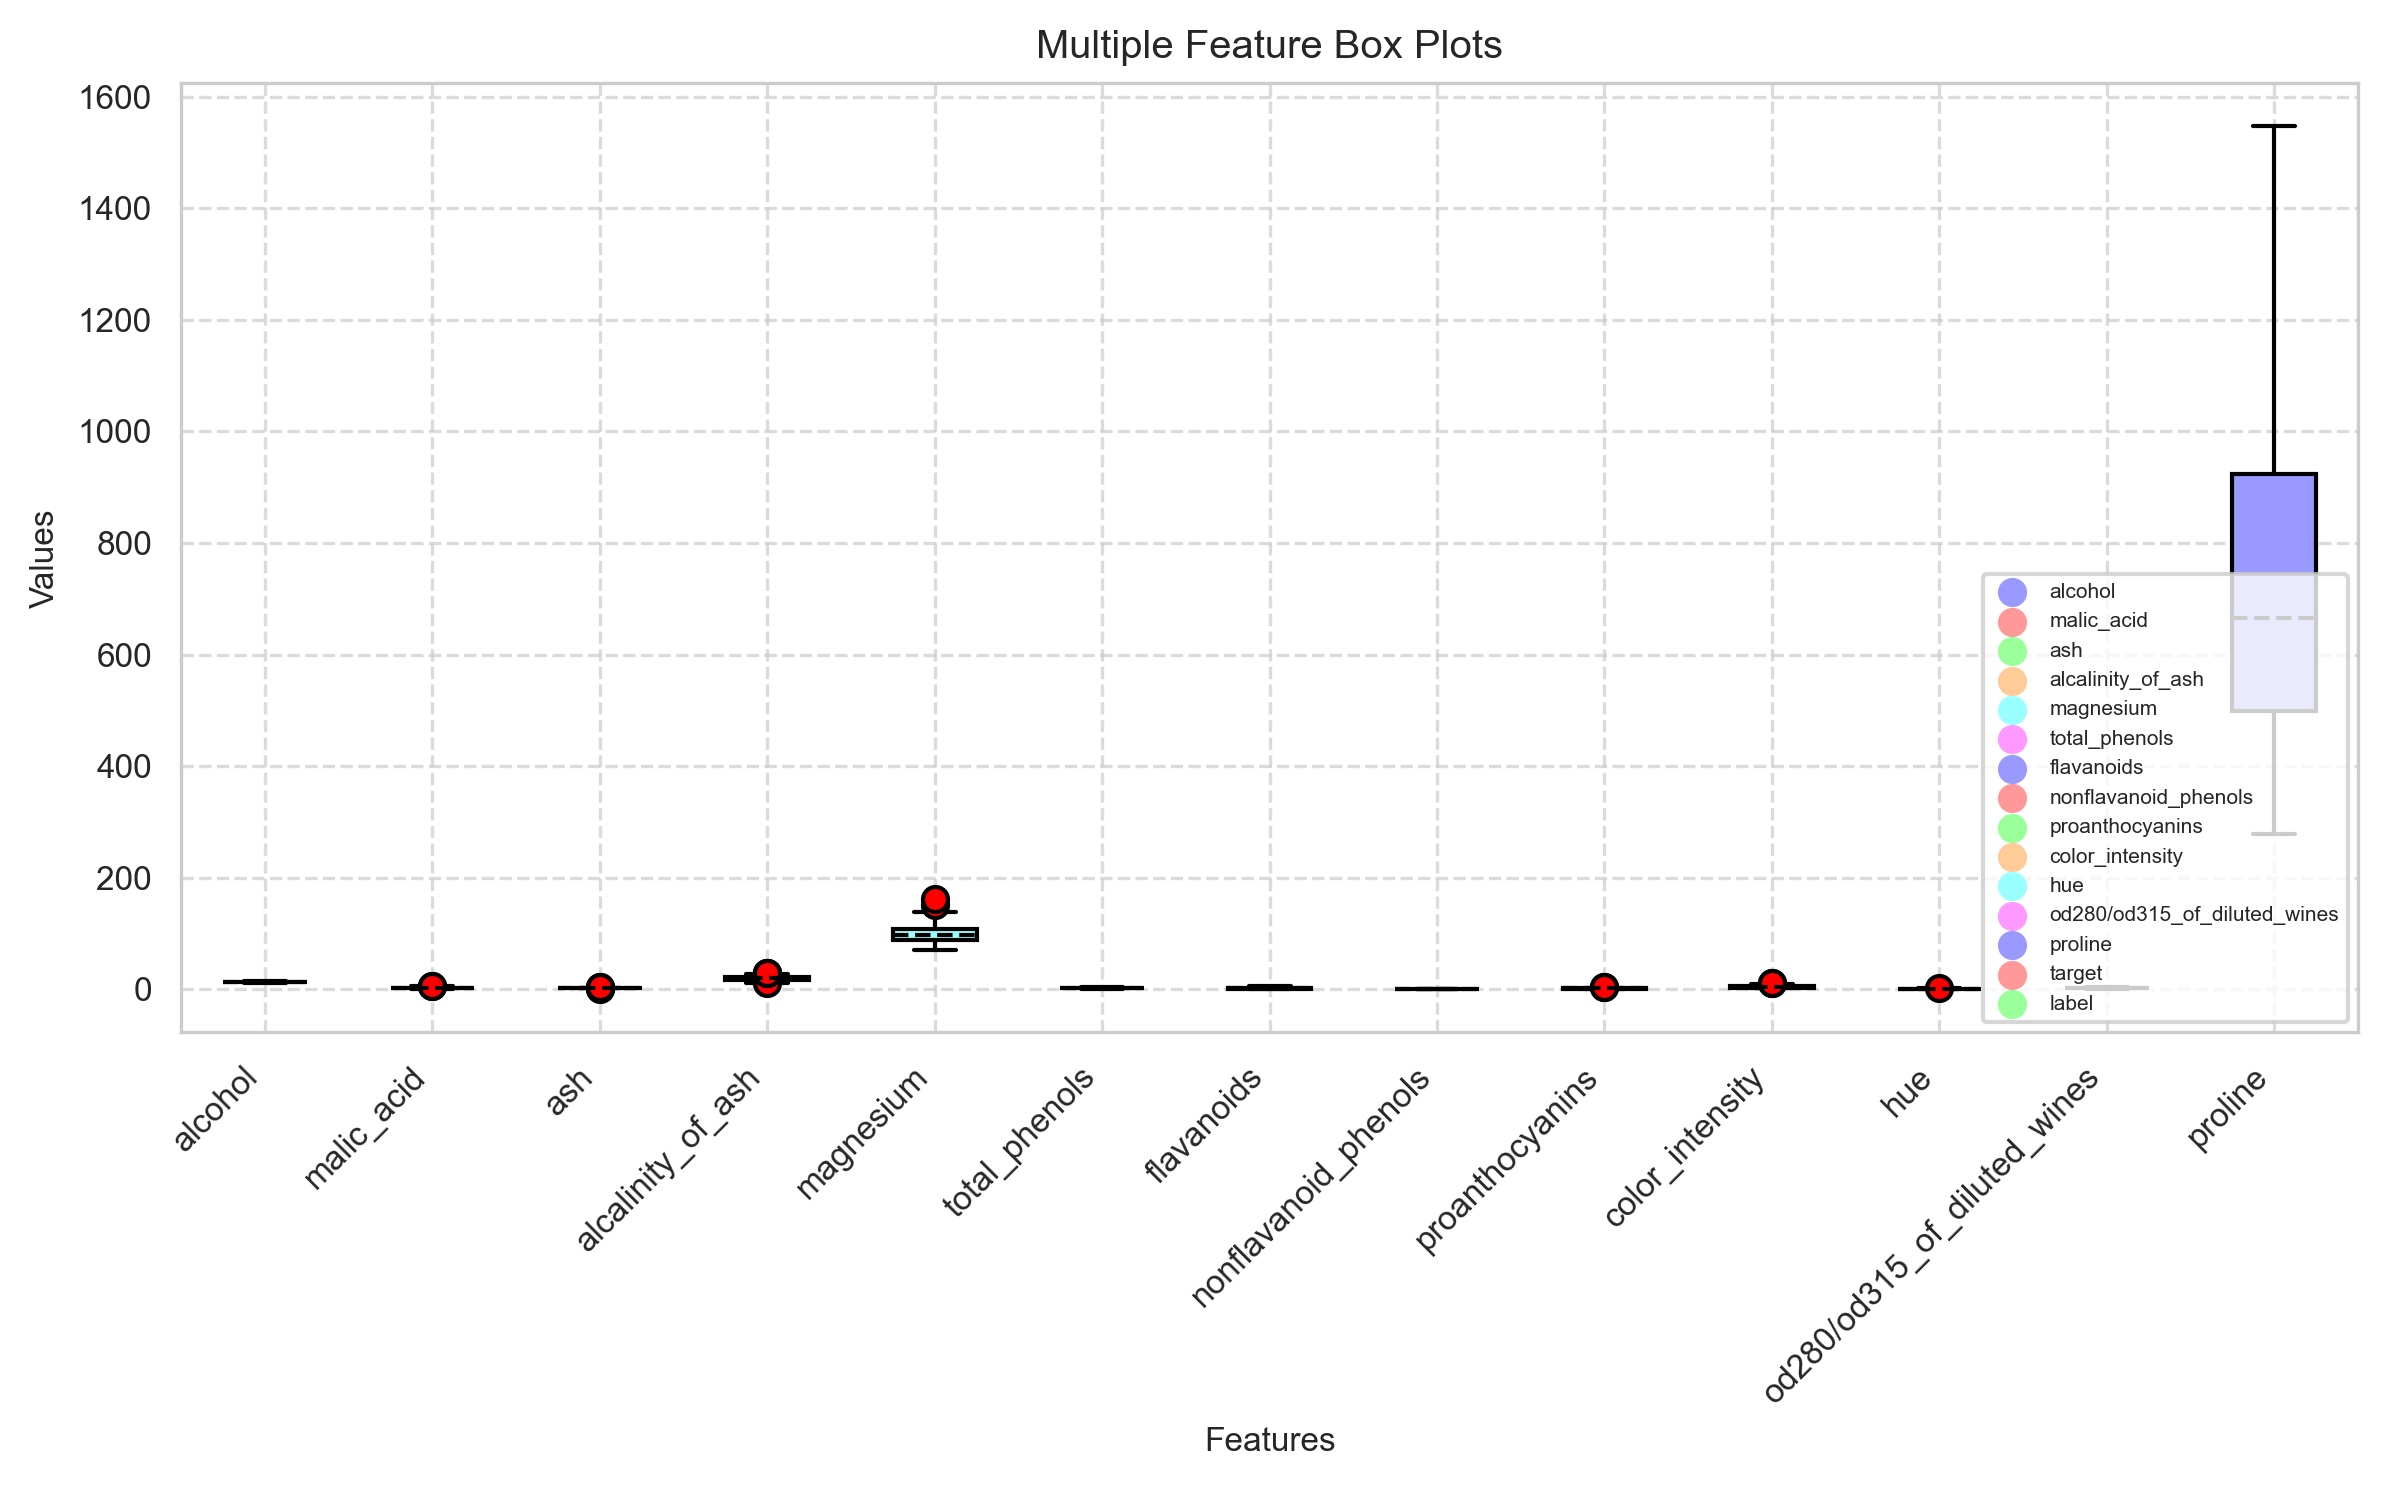

In [62]:
# 标准化和异常值检测的顺序是具体情况而定
# 如果先标准化再检测异常值，那么检测到的异常值会受标准化影响，所以通常先检测异常值，再标准化
# 对训练集通过箱线图进行异常值检测,由于尺度问题，可能一部分特征那个的箱线图会比较集中，看不太出来
# 设置字体和防止中文标签乱码
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
# 创建一个包含多个特征的箱线图
plt.figure(figsize=(8, 5),dpi=300)
sns.set_style("whitegrid")
# 遍历每个特征并绘制箱线图
box_df= pd.DataFrame(encoded_train,columns=columns)
colors = ['#9999ff', '#ff9999', '#99ff99', '#ffcc99', '#99ffff', '#ff99ff']
for i, feature in enumerate(box_df.columns):
    plt.boxplot(
        x=box_df[feature],
        widths=0.5,  # 箱线宽度
        positions=[i],  # 设置箱线图的位置
        patch_artist=True,  # 箱体颜色
        # showmeans=True,     # 显示均值
        boxprops={'color': 'black', 'facecolor': colors[i % len(colors)]},  # 设置箱体属性
        flierprops={'marker': 'o', 'markerfacecolor': 'red', 'color': 'black'},  # 设置异常值属性
        # meanprops={'marker': 'o', 'markerfacecolor': 'indianred'},  # 设置均值点的属性
        medianprops={'linestyle': '--', 'color': 'black'}  # 设置中位数线的属性
    )
# 设置标题和标签
plt.title('Multiple Feature Box Plots')
plt.xlabel('Features')
plt.ylabel('Values')
xticks = plt.xticks()
plt.xticks(xticks[0], xticks[1], rotation=45, ha='right', fontsize=8)
plt.yticks(fontsize=8)
plt.xticks(ticks=range(len(df.columns)), labels=df.columns)  # 设置x轴刻度标签
# 显示网格线
plt.grid(True, linestyle='--', alpha=0.7)
# 添加图例
for i, feature in enumerate(df.columns):
    plt.scatter([], [], c=colors[i % len(colors)], label=feature)
plt.legend(loc='lower right',fontsize=5)
plt.tight_layout()
plt.show()

In [63]:
# 使用箱线图法剔除异常值
def remove_outliers_boxplot(df, labels, columns):
    mask = np.ones(len(df), dtype=bool)
    for column in columns:
        Q1 = np.percentile(df[column], 25)
        Q3 = np.percentile(df[column], 75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        mask = mask & (df[column] >= lower_bound) & (df[column] <= upper_bound)
    outlier_indices = np.where(~mask)[0]  # 获取异常值的索引
    df_filtered = df[mask]
    labels_filtered = labels[mask]
    # 返回结果包括移除异常值后的数据集、标签和异常值的索引
    return df_filtered, labels_filtered, outlier_indices
X_train, y_train,outlier_indices = remove_outliers_boxplot(box_df.reset_index(drop=True),y_train.reset_index(drop=True),box_df.columns)

<!-- @format -->

## 3.7 数据标准化


In [64]:
# 标准化处理不改变数据的分布，只改变数据尺度
# 通常使用Sklearn库中的StandardScaler对数据进行标准化
from sklearn.preprocessing import StandardScaler
# 初始化StandardScaler对象
scaler = StandardScaler()
# 用训练数据拟合scaler
scaler.fit(encoded_train)
# 转换训练集和验证集 标准化前的格式是dataframe格式，标准化之后转换成numpy格式X_train_scaled
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(encoded_test)

# 保存标准化模型
dump(scaler, './models/scaler.joblib')

['./models/scaler.joblib']

<!-- @format -->

# 4 模型训练模块


<!-- @format -->

## 4.1 LogisticRegression 模型训练


LogisticRegression模型准确率: 0.9532710280373832
LogisticRegression模型召回准确率: 0.9612403100775193
LogisticRegression模型精确准确率: 0.9521367521367522

逻辑回归分类报告:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        36
           1       1.00      0.88      0.94        43
           2       0.93      1.00      0.97        28

    accuracy                           0.95       107
   macro avg       0.95      0.96      0.95       107
weighted avg       0.96      0.95      0.95       107

标准答案 [0 0 2 0 1 0 1 2 1 2 0 2 0 1 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0 0 1 2 0 0 0 2
 2 1 2 0 1 1 1 2 0 1 1 2 0 1 0 0 2 2 1 1 0 1 0 2 1 1 2 0 0 0 2 0 0 1 2 1 0
 2 1 0 2 1 1 0 1 0 0 1 0 0 2 1 1 1 0 1 1 1 2 2 0 1 2 2 1 1 0 1 2 2]
预测结果 [0 0 2 0 1 0 1 2 1 2 0 2 0 1 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0 0 1 2 0 0 0 2
 2 1 2 0 1 1 2 2 0 1 1 2 0 1 0 0 2 2 1 0 0 1 0 2 1 1 2 0 0 0 2 0 0 0 2 1 0
 2 1 0 2 1 1 0 1 0 0 1 0 0 2 1 1 1 0 1 1 1 2 2 0 1 2 2 2 0 0 1 2 2]


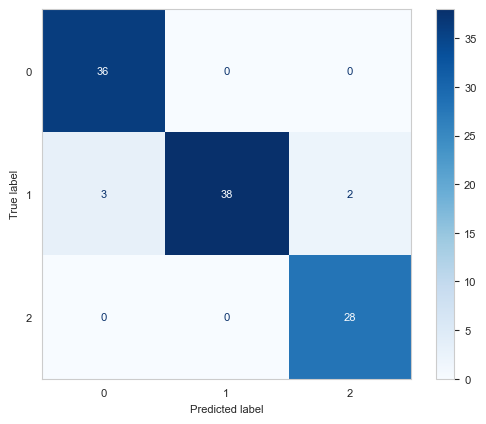

In [31]:
 # 导入准确率和分类报告指标
from sklearn.metrics import accuracy_score,recall_score,precision_score,classification_report 
from sklearn.linear_model import LogisticRegression  # 导入LogisticRegression模型
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 初始化逻辑回归模型
LogisticRegression_model = LogisticRegression(max_iter=5000)

# 在训练集上训练模型
LogisticRegression_model.fit(X_train_scaled, y_train)

# 在验证集上进行预测
y_pred_lr = LogisticRegression_model.predict(X_test_scaled)

# 计算模型准确率
# test: 这是验证集的真实标签
# pred: 这是刚才逻辑回归模型对验证集中每个样本的预测类别。
# 计算准确率等指标需要真实标签和预测标签。
accuracy_lr = accuracy_score(y_test, y_pred_lr)
# 对于不同分类模型，其计算指标的average参数不同，多分类使用'micro', 'macro', 'weighted'
# 二分类使用[None, 'micro', 'macro', 'weighted']
recall_lr = recall_score(y_test, y_pred_lr,average='macro')
precision_lr = precision_score(y_test, y_pred_lr,average='macro')
print("LogisticRegression模型准确率:", accuracy_lr)
print("LogisticRegression模型召回准确率:", recall_lr)
print("LogisticRegression模型精确准确率:", precision_lr)

# 打印分类报告，包括精确率、召回率、F1分数等指标
#在下一节，决策树中，我展开解释了这个分类报告的含义。
print("\n逻辑回归分类报告:")
print(classification_report(y_test, y_pred_lr))
print("标准答案",y_test.values)
print("预测结果",y_pred_lr)

# 打印混淆矩阵
# 对于二分类模型，输出是2*2矩阵，对于n分类问题，输出是n*n矩阵
# 混淆矩阵展示了模型的预测结果与实际标签之间的对比
cm_lr = confusion_matrix(y_test, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lr)

# 显示混淆矩阵
disp.plot(cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

<!-- @format -->

- 上述混淆矩阵表示，真实标签为 0 的预测正确 33 个，预测错误 0 个
- 真实标签为 1 的预测正确 32 个，预测错误的个数是 2 个
- 真实标签为 2 的预测正确 22 个，预测错误的个数是 0 个


<!-- @format -->

## 4.2 决策树 DecisionTree 分类模型训练


决策树模型准确率: 0.9101123595505618
决策树模型召回率: 0.9150326797385621
决策树模型精确率: 0.9224537037037037

决策树分类报告:
              precision    recall  f1-score   support

           0       0.91      0.88      0.89        33
           1       0.86      0.91      0.89        34
           2       1.00      0.95      0.98        22

    accuracy                           0.91        89
   macro avg       0.92      0.92      0.92        89
weighted avg       0.91      0.91      0.91        89



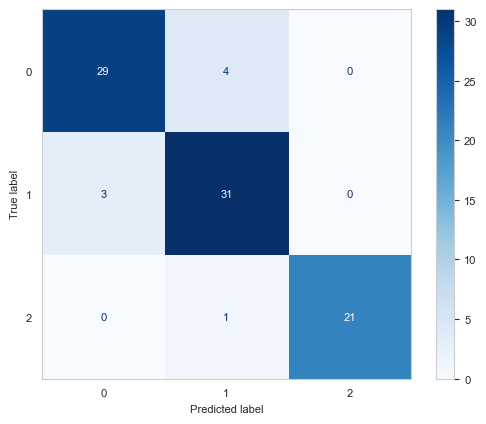

In [17]:
from sklearn.tree import DecisionTreeClassifier

# 初始化决策树模型
dt_model = DecisionTreeClassifier(random_state=42)

# 在训练集上训练模型
dt_model.fit(X_train_scaled, y_train)

# 在测试集上进行预测
y_pred_dt = dt_model.predict(X_test_scaled)

# 评估模型性能
accuracy_dt = accuracy_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt, average='macro')
precision_dt = precision_score(y_test, y_pred_dt, average='macro')

print("决策树模型准确率:", accuracy_dt)
print("决策树模型召回率:", recall_dt)
print("决策树模型精确率:", precision_dt)
print("\n决策树分类报告:")
print(classification_report(y_test, y_pred_dt))

dt_cm = confusion_matrix(y_test, y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=dt_cm)

# 显示混淆矩阵
# print(cm)
disp.plot(cmap=plt.cm.Blues)
plt.grid(False)
plt.show()


<!-- @format -->

## 4.3 支持向量机 SVC 分类模型训练


支持向量机模型准确率: 0.9887640449438202
支持向量机模型召回率: 0.98989898989899
支持向量机模型精确率: 0.9904761904761905

支持向量机分类报告:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.97      1.00      0.99        34
           2       1.00      1.00      1.00        22

    accuracy                           0.99        89
   macro avg       0.99      0.99      0.99        89
weighted avg       0.99      0.99      0.99        89



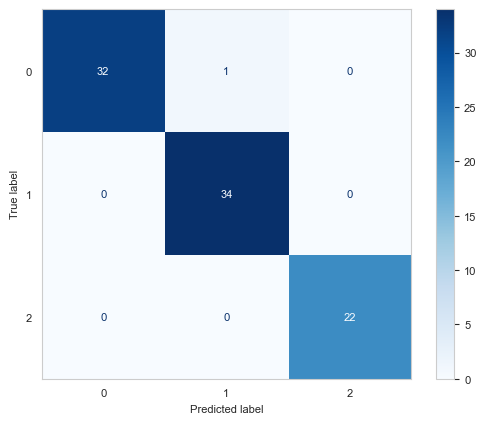

In [18]:
from sklearn.svm import SVC

# 初始化支持向量机模型
svm_model = SVC(probability=True,class_weight='balanced',random_state=42)

# 在训练集上训练模型
svm_model.fit(X_train_scaled, y_train)

# 在测试集上进行预测
y_pred_svm = svm_model.predict(X_test_scaled)

# 评估模型性能
accuracy_svm = accuracy_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm, average='macro')
precision_svm = precision_score(y_test, y_pred_svm, average='macro')

print("支持向量机模型准确率:", accuracy_svm)
print("支持向量机模型召回率:", recall_svm)
print("支持向量机模型精确率:", precision_svm)
print("\n支持向量机分类报告:")
print(classification_report(y_test, y_pred_svm))

svm_cm = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=svm_cm)

# 显示混淆矩阵
# print(cm)
disp.plot(cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

<!-- @format -->

## 4.3 随机森林 RandomForest 分类模型训练


随机森林模型准确率: 0.9662921348314607
随机森林模型召回率: 0.9699940582293524
随机森林模型精确率: 0.9705357142857144

随机森林分类报告:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        33
           1       0.94      0.97      0.96        34
           2       1.00      1.00      1.00        22

    accuracy                           0.97        89
   macro avg       0.97      0.97      0.97        89
weighted avg       0.97      0.97      0.97        89



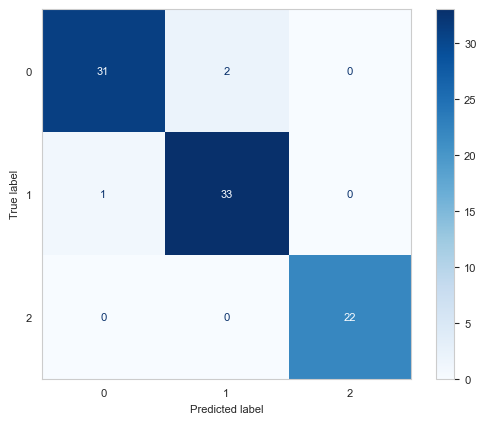

In [19]:
from sklearn.ensemble import RandomForestClassifier

# 初始化随机森林模型
rf_model = RandomForestClassifier(random_state=42)

# 在训练集上训练模型
rf_model.fit(X_train_scaled, y_train)

# 在测试集上进行预测
y_pred_rf = rf_model.predict(X_test_scaled)

# 评估模型性能
accuracy_rf = accuracy_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf, average='macro')
precision_rf = precision_score(y_test, y_pred_rf, average='macro')

print("随机森林模型准确率:", accuracy_rf)
print("随机森林模型召回率:", recall_rf)
print("随机森林模型精确率:", precision_rf)
print("\n随机森林分类报告:")
print(classification_report(y_test, y_pred_rf))

rf_cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm)

# 显示混淆矩阵
# print(cm)
disp.plot(cmap=plt.cm.Blues)
plt.grid(False)
plt.show()


<!-- @format -->

## 4.4 K 近邻 KNN 分类模型训练


K近邻模型准确率: 0.9438202247191011
K近邻模型召回率: 0.9509803921568628
K近邻模型精确率: 0.9494712103407755

K近邻分类报告:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        33
           1       1.00      0.85      0.92        34
           2       0.96      1.00      0.98        22

    accuracy                           0.94        89
   macro avg       0.95      0.95      0.95        89
weighted avg       0.95      0.94      0.94        89



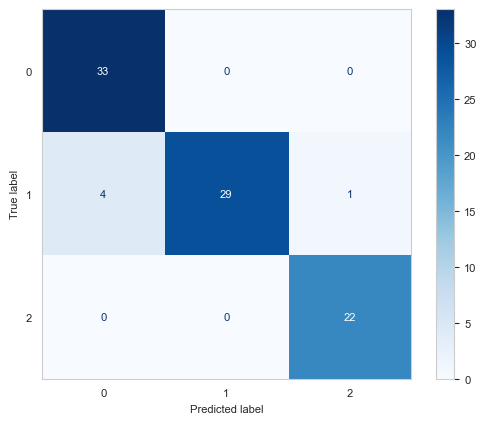

In [20]:
from sklearn.neighbors import KNeighborsClassifier

# 初始化K近邻模型
knn_model = KNeighborsClassifier(n_neighbors=3)

# 在训练集上训练模型
knn_model.fit(X_train_scaled, y_train)

# 在测试集上进行预测
y_pred_knn = knn_model.predict(X_test_scaled)

# 评估模型性能
accuracy_knn = accuracy_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn, average='macro')
precision_knn = precision_score(y_test, y_pred_knn, average='macro')

print("K近邻模型准确率:", accuracy_knn)
print("K近邻模型召回率:", recall_knn)
print("K近邻模型精确率:", precision_knn)
print("\nK近邻分类报告:")
print(classification_report(y_test, y_pred_knn))

knn_cm = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=knn_cm)

# 显示混淆矩阵
# print(cm)
disp.plot(cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

<!-- @format -->

## 4.5 朴素贝叶斯 GaussianNB 分类模型训练


朴素贝叶斯模型准确率: 0.9775280898876404
朴素贝叶斯模型召回率: 0.9800950683303625
朴素贝叶斯模型精确率: 0.9800950683303625

朴素贝叶斯分类报告:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        33
           1       0.97      0.97      0.97        34
           2       1.00      1.00      1.00        22

    accuracy                           0.98        89
   macro avg       0.98      0.98      0.98        89
weighted avg       0.98      0.98      0.98        89



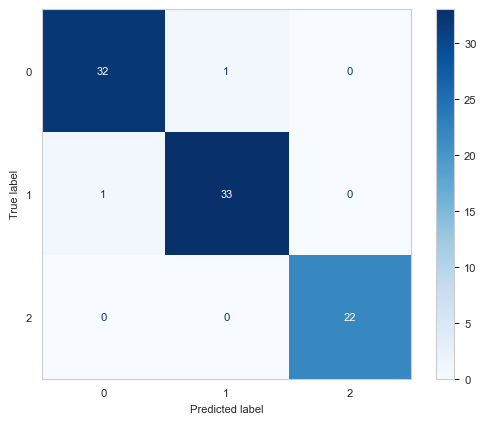

In [21]:
from sklearn.naive_bayes import GaussianNB

# 初始化朴素贝叶斯模型，GaussianNB不涉及随机初始化或随机过程，因此通常不需要设置随机种子。
nb_model = GaussianNB()

# 在训练集上训练模型
nb_model.fit(X_train_scaled, y_train)

# 在测试集上进行预测
y_pred_nb = nb_model.predict(X_test_scaled)

# 评估模型性能
accuracy_nb = accuracy_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb, average='macro')
precision_nb = precision_score(y_test, y_pred_nb, average='macro')

print("朴素贝叶斯模型准确率:", accuracy_nb)
print("朴素贝叶斯模型召回率:", recall_nb)
print("朴素贝叶斯模型精确率:", precision_nb)
print("\n朴素贝叶斯分类报告:")
print(classification_report(y_test, y_pred_nb))

nb_cm = confusion_matrix(y_test, y_pred_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=nb_cm)

# 显示混淆矩阵
# print(cm)
disp.plot(cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

<!-- @format -->

## 4.6 XGBoost 分类模型训练


XGBoost 模型准确率: 0.9438202247191011
XGBoost 模型召回率: 0.9453357100415923
XGBoost 模型精确率: 0.9512265512265512

XGBoost 分类报告:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        33
           1       0.94      0.91      0.93        34
           2       1.00      0.95      0.98        22

    accuracy                           0.94        89
   macro avg       0.95      0.95      0.95        89
weighted avg       0.95      0.94      0.94        89



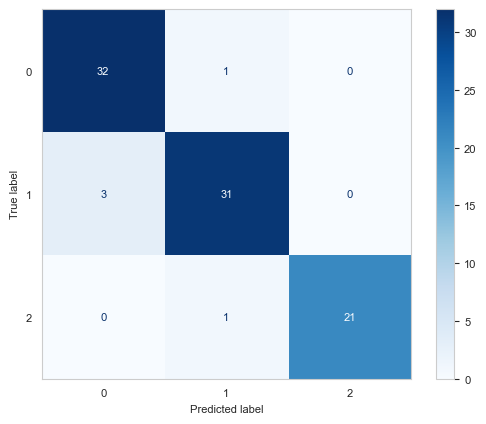

In [22]:
import xgboost as xgb

# 初始化 XGBoost 模型
xgb_model = xgb.XGBClassifier(
    n_estimators=200, # 树的数量，即迭代次数
    learning_rate=0.1, # 学习率，控制每次迭代权重更新的步长
    random_state=42 # 设置随机种子，以便重复性
)

# 训练模型
xgb_model.fit(X_train_scaled, y_train)

# 预测
y_pred_xgb = xgb_model.predict(X_test_scaled)

# 评估性能
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb, average='macro')
precision_xgb = precision_score(y_test, y_pred_xgb, average='macro')

print("XGBoost 模型准确率:", accuracy_xgb)
print("XGBoost 模型召回率:", recall_xgb)
print("XGBoost 模型精确率:", precision_xgb)
print("\nXGBoost 分类报告:")
print(classification_report(y_test, y_pred_xgb))

xgb_cm = confusion_matrix(y_test, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=xgb_cm)

# 显示混淆矩阵
# print(cm)
disp.plot(cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

<!-- @format -->

## 4.7 AdaBoost 分类模型训练


AdaBoost 模型准确率: 0.9213483146067416
AdaBoost 模型召回率: 0.9307783719548426
AdaBoost 模型精确率: 0.9259066319374876

AdaBoost 分类报告:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91        33
           1       0.94      0.85      0.89        34
           2       0.96      1.00      0.98        22

    accuracy                           0.92        89
   macro avg       0.93      0.93      0.93        89
weighted avg       0.92      0.92      0.92        89



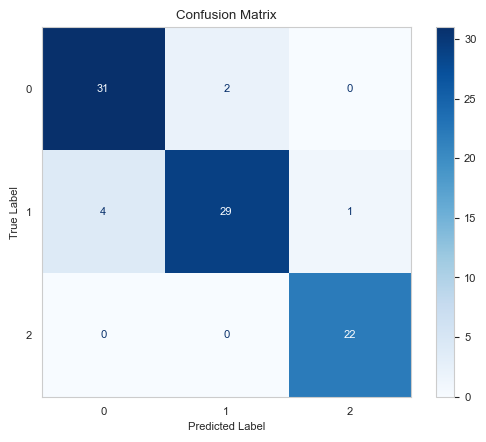

In [23]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# 初始化 AdaBoost 模型
# 默认使用 DecisionTreeClassifier 作为弱分类器
ada_model = AdaBoostClassifier(
    n_estimators=50,  # 弱分类器的数量
    learning_rate=1.0,  # 学习率
    random_state=42
)

# 训练模型
ada_model.fit(X_train_scaled, y_train)

# 预测
y_pred_ada = ada_model.predict(X_test_scaled)

# 评估性能
accuracy_ada = accuracy_score(y_test, y_pred_ada)
recall_ada = recall_score(y_test, y_pred_ada, average='macro')
precision_ada = precision_score(y_test, y_pred_ada, average='macro')

print("AdaBoost 模型准确率:", accuracy_ada)
print("AdaBoost 模型召回率:", recall_ada)
print("AdaBoost 模型精确率:", precision_ada)
print("\nAdaBoost 分类报告:")
print(classification_report(y_test, y_pred_ada))

# 计算混淆矩阵
ada_cm = confusion_matrix(y_test, y_pred_ada)

# 可视化混淆矩阵
disp = ConfusionMatrixDisplay(confusion_matrix=ada_cm)
disp.plot(cmap=plt.cm.Blues)
plt.grid(False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

<!-- @format -->

## 4.8 模型 ROC-AUC 指标可视化


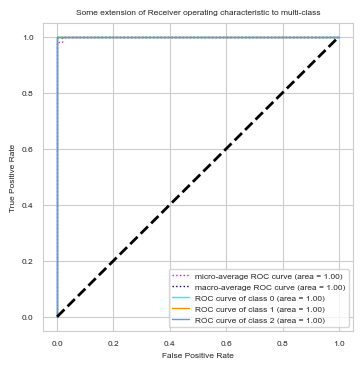

In [65]:
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from numpy import interp
# 对于多分类模型
# 对标签进行二值化
y = label_binarize(y_test, classes=list(set(y.values.tolist()))) # 三个类别
# 设置种类
n_classes = y.shape[1]

# 训练模型并预测
random_state = np.random.RandomState(0)
n_samples, n_features = X_test.shape

# 针对不同分类算法得到预测概率，然后进行均值计算
classifier = OneVsRestClassifier(LogisticRegression_model)
probabilities = classifier.fit(X_train_scaled, y_train).predict_proba(X_test_scaled) # 获得预测概率


# # 计算每一类的ROC
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y[:, i], probabilities[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 计算micro-average ROC 
fpr["micro"], tpr["micro"], _ = roc_curve(y.ravel(), probabilities.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# 计算macro-average ROC 
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# 绘制平均后的ROC曲线
plt.figure(figsize=(4,4))
plt.plot(fpr["micro"], tpr["micro"],
        label='micro-average ROC curve (area = {0:0.2f})'
            ''.format(roc_auc["micro"]),
        color='deeppink', linestyle=':', linewidth=1)

plt.plot(fpr["macro"], tpr["macro"],
        label='macro-average ROC curve (area = {0:0.2f})'
            ''.format(roc_auc["macro"]),
        color='navy', linestyle=':', linewidth=1)

# 绘制不同类的ROC曲线，三分类的颜色colors设置为三种，再多分类设置为多种
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=1,
            label='ROC curve of class {0} (area = {1:0.2f})'
            ''.format(i, roc_auc[i]))
# 画出对角线
plt.plot([0, 1], [0, 1], 'k--', lw=2)
# 设置坐标轴
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('False Positive Rate', fontsize=6)
plt.ylabel('True Positive Rate', fontsize=6)
# 设置刻度的字体大小
plt.tick_params(axis='both', which='major', labelsize=6)

plt.title('Some extension of Receiver operating characteristic to multi-class', fontsize=6)
# plt.grid(False)
plt.legend(loc="lower right", fontsize=6)
plt.show()


<!-- @format -->

## 4.9 保存模型文件


In [25]:
# 保存模型到文件
import joblib
# 把模型保存为一个名为LogisticRegression_model.joblib的文件,就在这个文件夹下
joblib.dump(LogisticRegression_model, './models/LogisticRegression_model.joblib')

# 在后续加载模型和使用模型的时候，也要同时加载数据处理的模块，对数据进行预处理

# 在后续模型的选择中，针对不同的分类任务，选择更看重的评价指标。
# 比如一些分类任务更看重精确率，在最后的模型选择中，选择精确率高的模型作为最后选择的模型。
# 对于最后选择好的模型进行效果的调优，比如调优参数，调优模型结构，调优数据处理方式等。

['./models/LogisticRegression_model.joblib']

<!-- @format -->

# 5 模型调优


<!-- @format -->

## 5.1 引入参数调优的必要模块


In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import joblib

<!-- @format -->

## 5.2 使用 GridSearchCV 寻找最佳参数


In [27]:

# 定义参数网格
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # 正则化强度的倒数
    'penalty': ['l1', 'l2'],              # 正则化类型
    'solver': ['liblinear', 'saga'],      # 求解器
    'class_weight': [None, 'balanced'],   # 类别权重
    'max_iter': [100, 200, 300]           # 最大迭代次数
}

# 使用网格搜索进行调参
grid_search = GridSearchCV(
    estimator=LogisticRegression_model,
    param_grid=param_grid,
    scoring='accuracy',  # 或者使用其他评估指标，如 'f1', 'roc_auc'
    cv=5,                # 5 折交叉验证
    n_jobs=-1,           # 使用所有 CPU 核心
    verbose=1
)

grid_search.fit(X_train_scaled, y_train)

# 查看最佳参数和最佳分数
print("最佳参数：", grid_search.best_params_)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
最佳参数： {'C': 10, 'class_weight': None, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


<!-- @format -->

## 5.3 使用最佳参数重新训练模型


In [28]:
# 如果想重新训练就使用最佳参数模型进行训练胡总和直接保存调用
best_model = grid_search.best_estimator_


# 评估参数最优模型性能
best_y_pred = best_model.predict(X_test_scaled)
best_accuracy = accuracy_score(y_test, best_y_pred)
best_recall = recall_score(y_test, best_y_pred,average='macro')
best_precision = precision_score(y_test, best_y_pred,average='macro')
print("最佳LogisticRegression模型准确率:", best_accuracy)
print("最佳LogisticRegression模型召回准确率:", best_recall)
print("最佳LogisticRegression模型精确准确率:", best_precision)
print("分类报告：\n", classification_report(y_test, best_y_pred))
print("混淆矩阵：\n", confusion_matrix(y_test, best_y_pred))

# 保存模型
joblib.dump(best_model, './models/best_logistic_regression_model.joblib')

最佳LogisticRegression模型准确率: 0.9887640449438202
最佳LogisticRegression模型召回准确率: 0.9901960784313726
最佳LogisticRegression模型精确准确率: 0.9855072463768115
分类报告：
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      0.97      0.99        34
           2       0.96      1.00      0.98        22

    accuracy                           0.99        89
   macro avg       0.99      0.99      0.99        89
weighted avg       0.99      0.99      0.99        89

混淆矩阵：
 [[33  0  0]
 [ 0 33  1]
 [ 0  0 22]]


['./models/best_logistic_regression_model.joblib']

<!-- @format -->

# 6 最佳模型推理模块


<!-- @format -->

## 6.1 引入模型推理必要的库


In [29]:
import pandas as pd
import numpy as np
from joblib import dump, load
from sklearn.preprocessing import LabelEncoder
import pickle

<!-- @format -->

## 6.2 对推理数据进行编码


In [30]:

# 加载映射字典
with open('./models/mapping_dicts.pkl', 'rb') as f:
    loaded_mapping_dicts = pickle.load(f)

inference_data = pd.read_csv('inference_wine.csv')
# 对推理数据进行编码
encoded_inference = inference_data.copy()
for feature in categorical_features:
    mapping = loaded_mapping_dicts[feature]
    # 处理未知类别
    encoded_inference[feature] = encoded_inference[feature].apply(lambda x: x if x in mapping else 'Unknown')
    # 应用映射字典
    encoded_inference[feature] = encoded_inference[feature].map(mapping)

# print("\n推理数据编码结果:")
# print(encoded_inference)

<!-- @format -->

## 6.3 加载模型进行推理


In [31]:
# 加载数据标准化模块
loaded_scaler = joblib.load('./models/scaler.joblib')
# 对推理数据进行标准化处理
scaled_encoded_inference = loaded_scaler.transform(encoded_inference.drop(['target'], axis=1))
# 查看标准化后的推理数据
encoded_inference.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,A
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,A
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,A
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,A
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,A


<!-- @format -->

## 6.4 加载模型调优的最佳模型进行模型推理


In [32]:
# 加载最佳模型进行预测
loaded_model = joblib.load('./models/best_logistic_regression_model.joblib')
# 将预测结果转化为dataframe格式，方便后续和推理数据合并
y_pred = pd.DataFrame(loaded_model.predict(scaled_encoded_inference), columns=['Predicted'])

# 将预测标签映射为类别名称
pre_result = pd.DataFrame(y_pred['Predicted'].replace({v:k for k,v in label_dict.items()})).rename(columns={'Predicted':'pre_result'})


In [33]:
result = pd.concat([inference_data.reset_index(drop=True),y_pred.reset_index(drop=True),pre_result.reset_index(drop=True)], axis=1)
result

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,Predicted,pre_result
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,A,0,A
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,A,0,A
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,A,0,A
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,A,0,A
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,A,0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,C,2,C
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,C,2,C
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,C,2,C
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,C,2,C


<!-- @format -->

## 6.5 对推理结果进行保存


In [34]:
# 保存模型推理结果
result.to_csv('result.csv', index=False)
print('模型推理完毕!!')

模型推理完毕!!


<!-- @format -->

## 6.6 模型推理结果可视化


每个主成分的方差贡献率: [0.34864227 0.18755268]


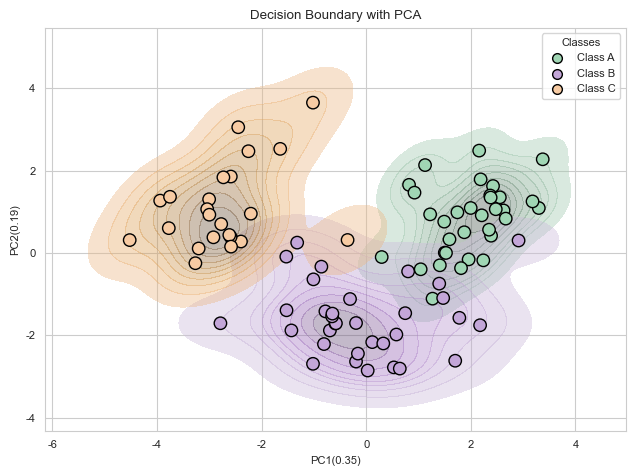

In [35]:
# 将数据通过PCA算法进行降维，将数据从高维空间映射到低维空间，以便于可视化。
# 导入PCA库
from sklearn.decomposition import PCA

# 使用 PCA 将数据降维到2D
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test_scaled)
variance_ratio = pca.explained_variance_ratio_
print("每个主成分的方差贡献率:", variance_ratio)
# 定义自定义颜色，对于多分类可以设定多个颜色，当前代码适合二分类和三分类模型
custom_colors = ['#A0D6B4', '#C3A6D8', '#F7CBA3']  # 按类别顺序定义颜色


# 绘制密度图
for i, label in enumerate(np.unique(best_y_pred)):
    subset = X_test_pca[best_y_pred == label]
    sns.kdeplot(x=subset[:, 0], y=subset[:, 1], 
                color=custom_colors[i], shade=True, alpha=0.4, label=f'Density (Class {dict[i]})')



# 绘制散点图
scatter = plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], 
                      c=[custom_colors[i] for i in best_y_pred], 
                      edgecolor='black', s=80)

# 添加轴标签和标题
plt.xlabel(f'PC1({variance_ratio[0]:.2f})')
plt.ylabel(f'PC2({variance_ratio[1]:.2f})')
plt.title('Decision Boundary with PCA')

# 添加图例
# 为了在图例中展示类别名称，需要将数字标签映射到对应标签，生成对应dict
label_target_dict = {v:k for k,v in label_dict.items()}
unique_labels = np.unique(best_y_pred)
for i, label in enumerate(unique_labels):
    plt.scatter([], [], color=custom_colors[i], edgecolor='black', s=100, label=f'Class {label_target_dict[i]}')

plt.legend(title="Classes", loc="upper right", markerscale=0.7)

# 调整布局以适应图例
plt.tight_layout(rect=[0, 0, 1, 1])

plt.show()

<!-- @format -->

### 如果需要进行项目的迁移，使用 pip freeze > requirements.txt 生成项目依赖包，

### 使用 pip install -r requirements.txt 安装依赖包
